# Task_2 : Titanic Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Documents\Bharat intern\train (1).csv")
test_df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Documents\Bharat intern\test.csv")

In [3]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Preprocessing

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

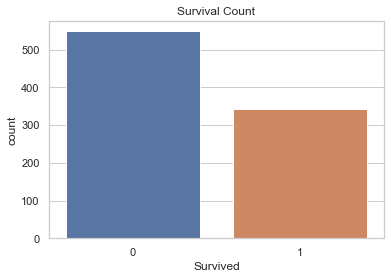

In [7]:
sns.set(style="whitegrid")

# Bar plot of survival count
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

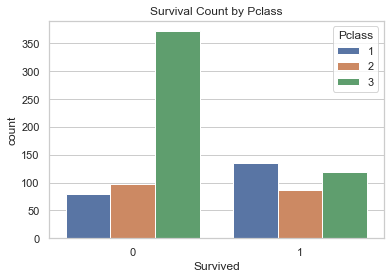

In [8]:
# Bar plot of survival count by Pclass
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival Count by Pclass')
plt.show()


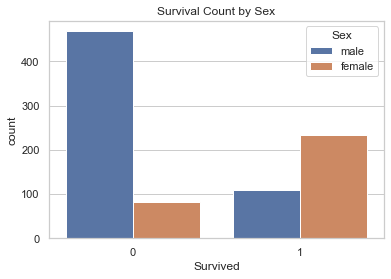

In [9]:
# Bar plot of survival count by Sex
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Count by Sex')
plt.show()


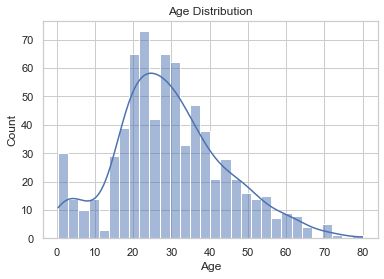

In [10]:
# Distribution of age
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

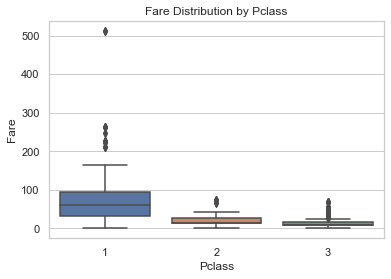

In [11]:
# Box plot of fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare Distribution by Pclass')
plt.show()

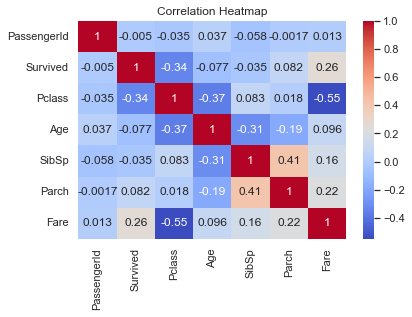

In [12]:
# Correlation heatmap
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
#Replacing null values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [14]:
#Dropping unwanted column
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [19]:
#Converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])


test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])
test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked'])


Feature selection and splitting of data

In [20]:
features=['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X=train_df[features]
y=train_df['Survived']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)

Model fitting - Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = rf.predict(X_val)

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



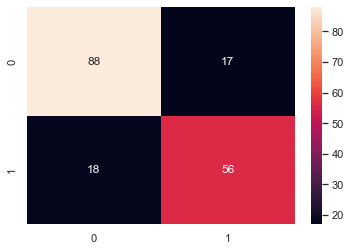

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Check accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_val, y_pred))
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.show()

Prediction on unseen test data

In [26]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [27]:
test_features = test_df[features]

In [31]:
# Make predictions on the test dataset
test_predictions= rf.predict(test_features)

In [33]:
result_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})

In [35]:
#Predicted dataframe
result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
